In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(42000, 785)

In [9]:
data = np.array(df)
m, n = data.shape
#np.random.shuffle(df) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [10]:
Y_train

array([1, 5, 1, ..., 7, 6, 9], dtype=int64)

Iteration:  10
0.10673170731707317
Iteration:  20
0.12648780487804878
Iteration:  30
0.1419512195121951
Iteration:  40
0.1599268292682927
Iteration:  50
0.18258536585365853
Iteration:  60
0.20690243902439023
Iteration:  70
0.25626829268292683
Iteration:  80
0.3076341463414634
Iteration:  90
0.35017073170731705
Iteration:  100
0.3900487804878049
Iteration:  110
0.4313170731707317
Iteration:  120
0.47056097560975607
Iteration:  130
0.5110487804878049
Iteration:  140
0.5460975609756098
Iteration:  150
0.5839512195121951
Iteration:  160
0.6235609756097561
Iteration:  170
0.6619024390243903
Iteration:  180
0.6883658536585365
Iteration:  190
0.7055609756097561
Iteration:  200
0.7198780487804878
Iteration:  210
0.7325609756097561
Iteration:  220
0.7431707317073171
Iteration:  230
0.7542682926829268
Iteration:  240
0.7631463414634146
Iteration:  250
0.7718048780487805
Iteration:  260
0.7791707317073171
Iteration:  270
0.7864390243902439
Iteration:  280
0.7930487804878049
Iteration:  290
0.799


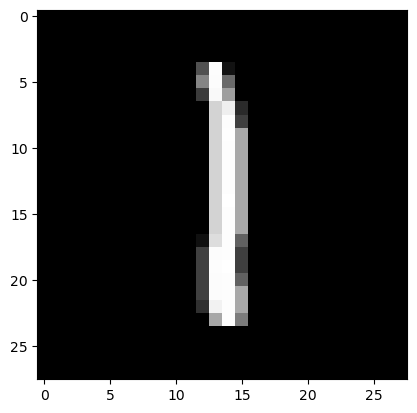

Prediction:  [5]
Label:  5


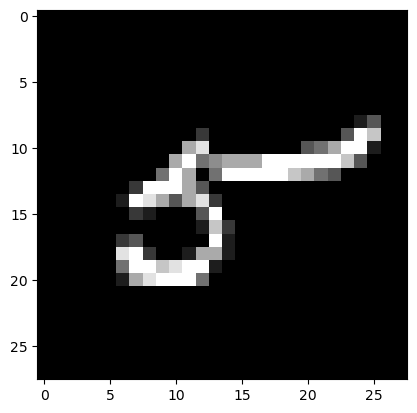

Prediction:  [1]
Label:  1


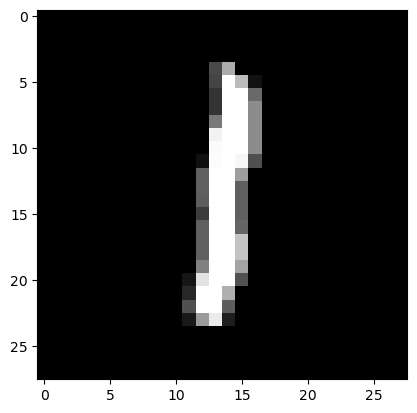

Prediction:  [7]
Label:  7


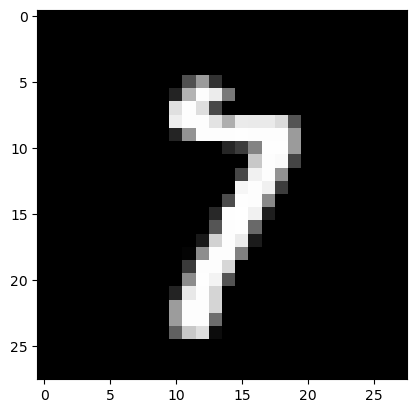

0.857

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0, keepdims=True)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return (Z > 0).astype(float)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def adam_optimizer(W1, b1, W2, b2, dW1, db1, dW2, db2, m_W1, v_W1, m_b1, v_b1, m_W2, v_W2, m_b2, v_b2, t, alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m_W1 = beta1 * m_W1 + (1 - beta1) * dW1
    v_W1 = beta2 * v_W1 + (1 - beta2) * (dW1 ** 2)
    m_b1 = beta1 * m_b1 + (1 - beta1) * db1
    v_b1 = beta2 * v_b1 + (1 - beta2) * (db1 ** 2)
    m_W2 = beta1 * m_W2 + (1 - beta1) * dW2
    v_W2 = beta2 * v_W2 + (1 - beta2) * (dW2 ** 2)
    m_b2 = beta1 * m_b2 + (1 - beta1) * db2
    v_b2 = beta2 * v_b2 + (1 - beta2) * (db2 ** 2)

    m_W1_hat = m_W1 / (1 - beta1 ** t)
    v_W1_hat = v_W1 / (1 - beta2 ** t)
    m_b1_hat = m_b1 / (1 - beta1 ** t)
    v_b1_hat = v_b1 / (1 - beta2 ** t)
    m_W2_hat = m_W2 / (1 - beta1 ** t)
    v_W2_hat = v_W2 / (1 - beta2 ** t)
    m_b2_hat = m_b2 / (1 - beta1 ** t)
    v_b2_hat = v_b2 / (1 - beta2 ** t)

    W1 = W1 - alpha * m_W1_hat / (np.sqrt(v_W1_hat) + epsilon)
    b1 = b1 - alpha * m_b1_hat / (np.sqrt(v_b1_hat) + epsilon)
    W2 = W2 - alpha * m_W2_hat / (np.sqrt(v_W2_hat) + epsilon)
    b2 = b2 - alpha * m_b2_hat / (np.sqrt(v_b2_hat) + epsilon)

    return W1, b1, W2, b2, m_W1, v_W1, m_b1, v_b1, m_W2, v_W2, m_b2, v_b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

# Gradient descent optimization
def gradient_descent_1(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    m_W1, v_W1, m_b1, v_b1 = np.zeros_like(W1), np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(b1)
    m_W2, v_W2, m_b2, v_b2 = np.zeros_like(W2), np.zeros_like(W2), np.zeros_like(b2), np.zeros_like(b2)

    for i in range(1, iterations + 1):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2, m_W1, v_W1, m_b1, v_b1, m_W2, v_W2, m_b2, v_b2 = adam_optimizer(
            W1, b1, W2, b2, dW1, db1, dW2, db2,
            m_W1, v_W1, m_b1, v_b1, m_W2, v_W2, m_b2, v_b2,
            i, alpha=alpha
        )
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))

    return W1, b1, W2, b2

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.001, iterations=500)

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()



Prediction:  [1]
Label:  1


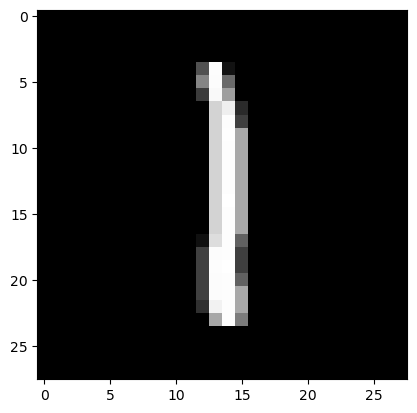

Prediction:  [5]
Label:  5


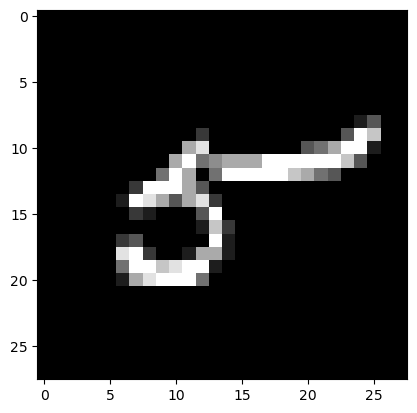

Prediction:  [1]
Label:  1


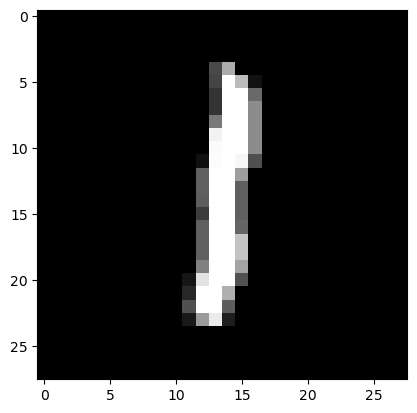

Prediction:  [8]
Label:  8


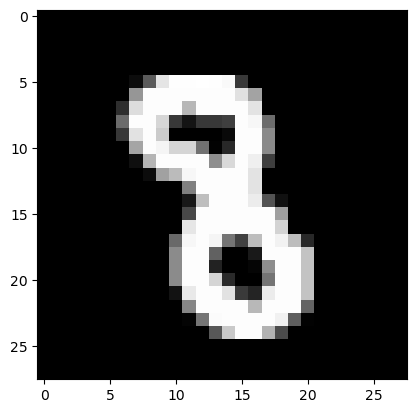

0.857

In [29]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)
